In [1]:
'''
【课程1.7】  相关性分析

分析连续变量之间的线性相关程度的强弱

图示初判 / Pearson相关系数（皮尔逊相关系数） / Sperman秩相关系数（斯皮尔曼相关系数）

'''

'\n【课程1.7】  相关性分析\n\n分析连续变量之间的线性相关程度的强弱\n\n图示初判 / Pearson相关系数（皮尔逊相关系数） / Sperman秩相关系数（斯皮尔曼相关系数）\n\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

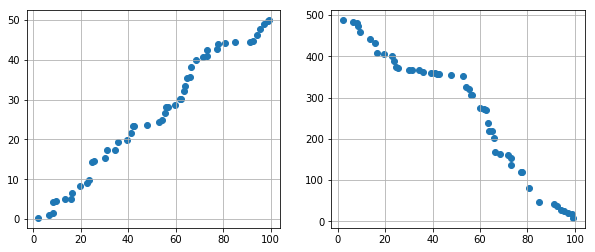

In [4]:
# 图示初判
# （1）变量之间的线性相关性

data1 = pd.Series(np.random.rand(50)*100).sort_values()
data2 = pd.Series(np.random.rand(50)*50).sort_values()
data3 = pd.Series(np.random.rand(50)*500).sort_values(ascending = False)
# 创建三个数据：data1为0-100的随机数并从小到大排列，data2为0-50的随机数并从小到大排列，data3为0-500的随机数并从大到小排列，

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(data1, data2)
plt.grid()
# 正线性相关

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(data1, data3)
plt.grid()
# 负线性相关

,A,B,C,D
0,21.258258,-49.484400,1.708867,82.443877
1,-36.527600,-121.849552,-135.400601,58.773973
2,139.604106,102.555938,-14.734228,55.797548
3,-201.719070,-77.476152,49.420161,127.204453
4,-66.331103,-167.235014,-199.799776,-235.230605


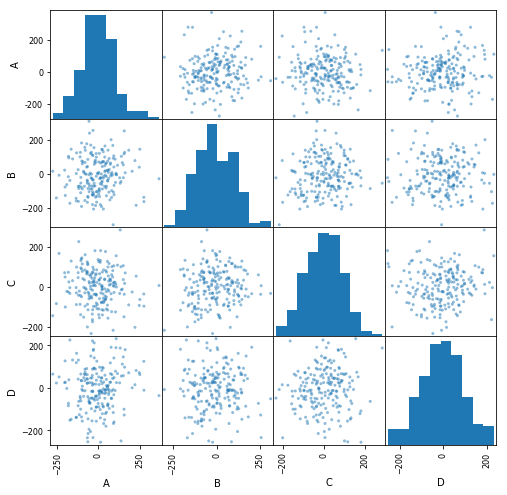

In [41]:
# 图示初判
# （2）散点图矩阵初判多变量间关系

data = pd.DataFrame(np.random.randn(200,4)*100, columns = ['A','B','C','D'])
pd.plotting.scatter_matrix(data,figsize = (8,8))
data.head()

In [46]:
# Pearson相关系数
data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
print('------')
# 创建样本数据

u1,u2 = data['value1'].mean(),data['value2'].mean()  # 计算均值
std1,std2 = data['value1'].std(),data['value2'].std()  # 计算标准差
print('value1正态性检验：\n',stats.kstest(data['value1'], 'norm', (u1, std1)))
print('value2正态性检验：\n',stats.kstest(data['value2'], 'norm', (u2, std2)))
print('------')
# 正态性检验 → pvalue >0.05

data['(x-u1)*(y-u2)'] = (data['value1'] - u1) * (data['value2'] - u2)
data['(x-u1)**2'] = (data['value1'] - u1)**2
data['(y-u2)**2'] = (data['value2'] - u2)**2
print(data.head())
print('------')
# 制作Pearson相关系数求值表

r = data['(x-u1)*(y-u2)'].sum() / (np.sqrt(data['(x-u1)**2'].sum() * data['(y-u2)**2'].sum()))
print('Pearson相关系数为：%.4f' % r)
# 求出r
# |r| > 0.8 → 高度线性相关

     value1    value2
0  0.908635  0.537714
1  1.401319  0.799189
2  1.655035  1.442366
3  2.194647  1.495255
4  3.465502  1.881303
------
value1正态性检验：
 KstestResult(statistic=0.08795053383395052, pvalue=0.4017859098854215)
value2正态性检验：
 KstestResult(statistic=0.08165956913460698, pvalue=0.4995703780589887)
------
     value1    value2  (x-u1)*(y-u2)    (x-u1)**2   (y-u2)**2
0  0.908635  0.537714    1070.340605  2286.578513  501.023256
1  1.401319  0.799189    1046.938143  2239.702718  489.386144
2  1.655035  1.442366    1011.049930  2215.752642  461.342996
3  2.194647  1.495255     996.998624  2165.242767  459.073814
4  3.465502  1.881303     952.296205  2048.586562  442.679884
------
Pearson相关系数为：0.9949


In [48]:
# Pearson相关系数 - 算法

data1 = pd.Series(np.random.rand(100)*100).sort_values()
data2 = pd.Series(np.random.rand(100)*50).sort_values()
data = pd.DataFrame({'value1':data1.values,
                     'value2':data2.values})
print(data.head())
print('------')
# 创建样本数据

data.corr()
# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson

     value1    value2
0  2.262546  0.258501
1  2.367911  1.538424
2  3.827426  1.595893
3  4.054910  2.553616
4  6.145673  3.028844
------


,value1,value2
value1,1.000000,0.996606
value2,0.996606,1.000000


In [50]:
# Sperman秩相关系数

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('------')
# 创建样本数据

data.sort_values('智商', inplace=True)
data['range1'] = np.arange(1,len(data)+1)
data.sort_values('每周看电视小时数', inplace=True)
data['range2'] = np.arange(1,len(data)+1)
print(data)
print('------')
# “智商”、“每周看电视小时数”重新按照从小到大排序，并设定秩次index

data['d'] = data['range1'] - data['range2']
data['d2'] = data['d']**2
print(data)
print('------')
# 求出di，di2

n = len(data)
rs = 1 - 6 * (data['d2'].sum()) / (n * (n**2 - 1))    #函数
print('Pearson相关系数为：%.4f' % rs)
# 求出rs

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------
    智商  每周看电视小时数  range1  range2
1   86         0       1       1
8  112         6       9       2
0  106         7       7       3
7  113        12      10       4
9  110        17       8       5
6   97        20       2       6
2  100        27       4       7
4   99        28       3       8
5  103        29       6       9
3  101        50       5      10
------
    智商  每周看电视小时数  range1  range2  d  d2
1   86         0       1       1  0   0
8  112         6       9       2  7  49
0  106         7       7       3  4  16
7  113        12      10       4  6  36
9  110        17       8       5  3   9
6   97        20       2       6 -4  16
2  100        27       4       7 -3   9
4   99        28       3       8 -5  25
5  103        29       6       9 -3   9
3  101        50       5      10 -5 

In [51]:
# Pearson相关系数 - 算法

data = pd.DataFrame({'智商':[106,86,100,101,99,103,97,113,112,110],
                    '每周看电视小时数':[7,0,27,50,28,29,20,12,6,17]})
print(data)
print('------')
# 创建样本数据

data.corr(method='spearman')
# pandas相关性方法：data.corr(method='pearson', min_periods=1) → 直接给出数据字段的相关系数矩阵
# method默认pearson

    智商  每周看电视小时数
0  106         7
1   86         0
2  100        27
3  101        50
4   99        28
5  103        29
6   97        20
7  113        12
8  112         6
9  110        17
------


,智商,每周看电视小时数
智商,1.000000,-0.175758
每周看电视小时数,-0.175758,1.000000
